## 4.2 워드 클라우드

수집한 데이터 중 해시태그 정보들을 워드 클라우드로 시각화  
- 워드 클라우드 : 텍스트 내에서 출현하는 단어들의 출현 빈도수에 비례하는 크기로 표출한 그래프

### 4.2.1 워드 클라우드 만드는 과정
1. 인스타그램을 크롤링한 데이터 중 해시태그 데이터를 불러온 후, 해시태그 종류별로 빈도수를 집계
2. 해시태그별 빈도수를 그래프를 통해 살펴본 후 분석에 불필요한 해시태그들은 제거하고 의미 있는 해시태그들로 워드 클라우드를 생성

### 4.2.2 해시태그 데이터 불러오기
크롤링한 데이터를 저장한 엑셀 파일을 엽니다.

In [1]:
import pandas as pd
!dir files

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: E623-376D

 C:\Users\jye12\Python\DataAnalysis\직장인을_위한_데이터분석_실무_with_파이썬\제주도_핫플레이스\files 디렉터리

2020-07-09  오후 04:03    <DIR>          .
2020-07-09  오후 04:03    <DIR>          ..
2020-07-09  오후 04:03            15,729 3_3_locations.xlsx
2020-07-09  오후 04:03           190,206 crawling_raw.xlsx
2020-07-09  오후 04:03            63,564 jejudoGwanGwang.xlsx
2020-07-09  오후 04:03            78,035 jejudoMatJip.xlsx
2020-07-09  오후 04:03            85,043 jejudoYeoHang.xlsx
2020-07-09  오후 04:03           192,305 jeju_tag_wordcloud.png
2020-07-09  오후 04:03            10,778 location_counts.xlsx
2020-07-09  오후 04:03            10,459 location_inform.xlsx
               8개 파일             646,119 바이트
               2개 디렉터리  138,072,190,976 바이트 남음


In [2]:
raw_total = pd.read_excel('./files/crawling_raw.xlsx')
raw_total['tags'][:3]

0                                           ['#여기어디게']
1                                                   []
2    ['#제주도', '#제주도관광', '#제주도여행', '#서귀포가볼만한곳', '#제주...
Name: tags, dtype: object

In [3]:
tags_total = []

for tags in raw_total['tags']:
    try:
        tags_list = tags[2:-2].split("', '")
        for tag in tags_list:
            tags_total.append(tag)
    except:
          pass

In [4]:
tags_total[:5]

['#여기어디게', '', '#제주도', '#제주도관광', '#제주도여행']

In [5]:
from collections import Counter
tags_counts = Counter(tags_total)

In [6]:
tags_counts.most_common(50)

[('#제주도여행', 414),
 ('', 286),
 ('#제주도', 285),
 ('#제주도관광', 278),
 ('#제주도맛집', 267),
 ('#제주여행', 239),
 ('#제주맛집', 212),
 ('#제주', 172),
 ('#서귀포맛집', 129),
 ('#애월맛집', 116),
 ('#제주가볼만한곳', 110),
 ('#오설록맛집', 97),
 ('#제주도핫플레이스', 90),
 ('#협재맛집', 86),
 ('#제주카페', 84),
 ('#한림맛집', 83),
 ('#산방산맛집', 77),
 ('#제주공항근처맛집', 73),
 ('#정직한돈', 72),
 ('#제주중문맛집', 70),
 ('#제주도카페', 66),
 ('#jeju', 66),
 ('#제주도태교여행', 64),
 ('#산방산근처맛집', 64),
 ('#제주도민맛집', 63),
 ('#제주도맛집리스트', 63),
 ('#제주안덕면맛집', 63),
 ('#제주도현지인맛집', 63),
 ('#제주도중문맛집', 63),
 ('#제주중문단지맛집', 63),
 ('#둥이네식당', 63),
 ('#제주두루치기맛집', 63),
 ('#통문어두루치기', 63),
 ('#제주도두루치기맛집', 63),
 ('#제주모슬포맛집', 62),
 ('#제주도밤에가볼만한곳', 60),
 ('#제주애월맛집', 58),
 ('#여행스타그램', 57),
 ('#제주도가볼만한곳', 53),
 ('#제주핫플', 53),
 ('#제주핫플레이스', 51),
 ('#여행에미치다', 50),
 ('#제주협재맛집', 47),
 ('#제주맛집추천', 43),
 ('#일상', 43),
 ('#제주시맛집', 42),
 ('#서귀포카페', 41),
 ('#제주관광', 39),
 ('#협재해수욕장', 38),
 ('#수목원길야시장', 37)]

In [7]:
#제주도 관광과 무관한 해시태그를 저장
STOPWORDS = ['#일상','#여행에미치다','#여행스타그램','#소통','#맞팔','#제주도','#jeju','#제주','','#로빠꼬야','#공주드레스']

tag_total_selected = []
for tag in tags_total:
    if  tag not in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주도여행', 414),
 ('#제주도관광', 278),
 ('#제주도맛집', 267),
 ('#제주여행', 239),
 ('#제주맛집', 212),
 ('#서귀포맛집', 129),
 ('#애월맛집', 116),
 ('#제주가볼만한곳', 110),
 ('#오설록맛집', 97),
 ('#제주도핫플레이스', 90),
 ('#협재맛집', 86),
 ('#제주카페', 84),
 ('#한림맛집', 83),
 ('#산방산맛집', 77),
 ('#제주공항근처맛집', 73),
 ('#정직한돈', 72),
 ('#제주중문맛집', 70),
 ('#제주도카페', 66),
 ('#제주도태교여행', 64),
 ('#산방산근처맛집', 64),
 ('#제주도민맛집', 63),
 ('#제주도맛집리스트', 63),
 ('#제주안덕면맛집', 63),
 ('#제주도현지인맛집', 63),
 ('#제주도중문맛집', 63),
 ('#제주중문단지맛집', 63),
 ('#둥이네식당', 63),
 ('#제주두루치기맛집', 63),
 ('#통문어두루치기', 63),
 ('#제주도두루치기맛집', 63),
 ('#제주모슬포맛집', 62),
 ('#제주도밤에가볼만한곳', 60),
 ('#제주애월맛집', 58),
 ('#제주도가볼만한곳', 53),
 ('#제주핫플', 53),
 ('#제주핫플레이스', 51),
 ('#제주협재맛집', 47),
 ('#제주맛집추천', 43),
 ('#제주시맛집', 42),
 ('#서귀포카페', 41),
 ('#제주관광', 39),
 ('#협재해수욕장', 38),
 ('#수목원길야시장', 37),
 ('#서귀포가볼만한곳', 36),
 ('#서귀포여행', 34),
 ('#제주공항맛집', 34),
 ('#곽지맛집', 34),
 ('#혜윰갤러리', 33),
 ('#요정드레스', 33),
 ('#할로윈파티', 33)]

#### 4.2.4 막대차트로 해시태그 살펴보기


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='NanumGothic')

In [9]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

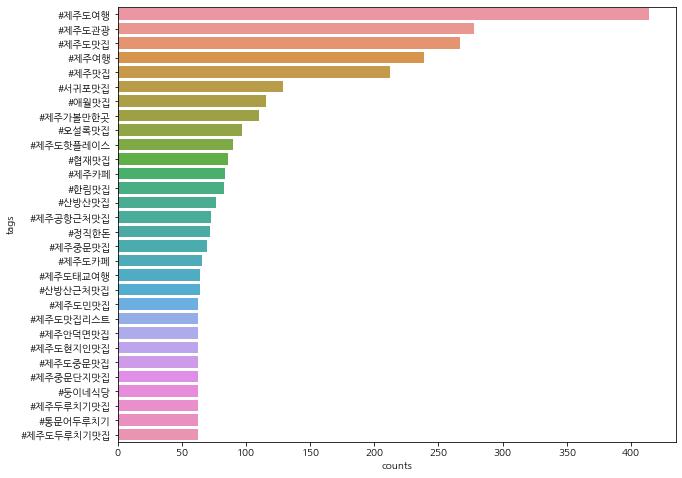

In [10]:
#차트 이밎의 크기를 조정하는 함수
plt.figure(figsize =(10,8))
#sns.barplot은 x,y,data 를 입력하여 막대그래프로 시각화
sns.barplot(x='counts',y= 'tags', data= tag_counts_df)

#### 4.2.5 워드 클라우드 그리기


In [11]:
!pip install wordcloud

In [12]:
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path ='c:/Windows/Fonts/NanumGothic.ttf'

In [18]:
wordcloud = WordCloud(font_path =font_name,          #글꼴
                     background_color='white',           #배경색
                     max_words=100,                      #최대 몇 개의 단어를 나타낼 것인지
                     relative_scaling=0.3,               # 워드 클라우드 내 글자들의 상대적인 크기 (0: 빈도수의 순위 , 1:빈도수 자체)
                     width =800,
                     height=400).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/jeju_tag_wordcloud.png')

OSError: cannot open resource

해시태그의 특성상 특정 지역에 대한 언급보다는 보편적인 표현이 많아 우리가 원하는 핫플레이스 파악이 여의치 않습니다.  
다음 장에서는 위치 정보를 이용해 지도 시각화를 하며 핫플레이스가 어디인지 확인해 보겠습니다.

In [20]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows//Fonts/나누.ttf").get_name()
rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Windows/Fonts/NanumGothic.ttf'